In [1]:
"""
@Author: Praveen Dominic
This code detects nudity in a video by analyzing the content of each frame.
I have used a pretrained model by Gantman (https://github.com/GantMan/nsfw_model/) to accomplish this task
"""
!pip install nsfw-detector
!pip install sk-video

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 89 kB 3.7 MB/s 
  Attempting uninstall: tensorflow-hub
    Found existing installation: tensorflow-hub 0.12.0
    Uninstalling tensorflow-hub-0.12.0:
      Successfully uninstalled tensorflow-hub-0.12.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 4.9 MB/s 


In [2]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from nsfw_detector import predict
import numpy as np
import requests
from PIL import Image
import skvideo.io
import cv2
from google.colab.patches import cv2_imshow

In [3]:
def load_model():
  global model
  model=predict.load_model("/content/drive/MyDrive/Colab Notebooks/Justo/Custom Nudity/mobilenet_v2_140_224/saved_model.h5")

In [4]:
def video_profanity_detector(video_path):
  videodata = skvideo.io.vread(video_path)
  flag=''
  frame_num=0
  for i in range(len(videodata)):
    frame = videodata[i]
    im=Image.fromarray(frame).resize((224,224))
    image = keras.preprocessing.image.img_to_array(im)
    image /=255
    image=np.expand_dims(image,axis=0)

    res=predict.classify_nd(model,image)[0]
    # print(res)
    if ((res.get('porn')>0.7) or (res.get('sexy')>0.7) or (res.get('hentai')>0.5)):
      flag='x'
      frame_num=i
      print(i)
      print(res)
      # print("Obscene content detected!")
      cv2_imshow(frame)
      break
    
  if flag!='x':
    # print("Video is safe for publishing!")
    result="Video is safe for publishing!"
  else:
    # print(f'Obscene content detected! at frame {frame_num}')
    result="Obscene content detected! at frame {frame_num}"
  return result

In [5]:
load_model()

1/1 [==============================] - 1s 937ms/step
0
{'drawings': 0.07647114247083664, 'hentai': 0.04376743361353874, 'neutral': 0.1002202257514, 'porn': 0.7456602454185486, 'sexy': 0.03388093039393425}


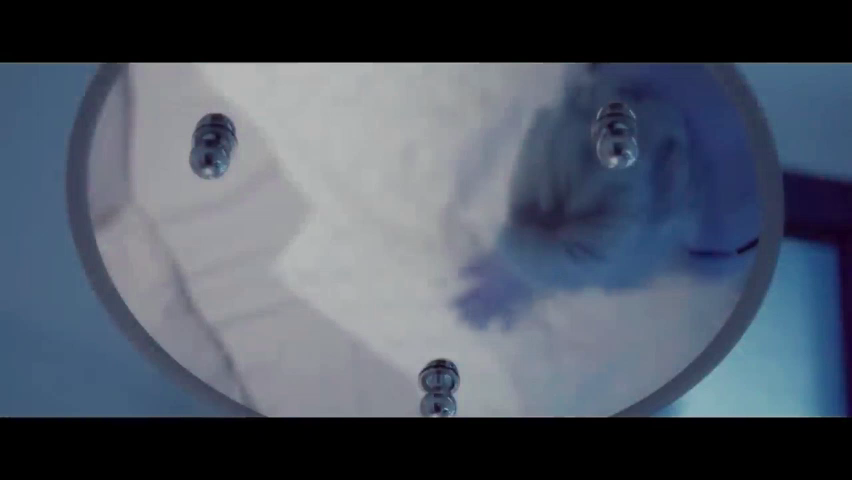

'Obscene content detected! at frame {frame_num}'

CPU times: user 2.11 s, sys: 1.52 s, total: 3.63 s
Wall time: 6.3 s


In [6]:
%%time
video_path='/content/drive/MyDrive/Colab Notebooks/Justo/Custom Nudity/data/video/neutral/sv3.mp4'
video_profanity_detector(video_path)

In [ ]:
# !pip install gradio

def main_v(video_path):
  load_model()
  # video_path='/content/drive/MyDrive/Colab Notebooks/Justo/Custom Nudity/data/video/neutral/sv22.mp4'
  res=video_profanity_detector(video_path)
  return res

In [ ]:
import gradio as gr

In [ ]:
# gr.Interface(fn=main_v,
#              inputs='video',
#              outputs='text').launch(share=True)